Dataset Link =  https://drive.google.com/drive/folders/1yko1IEdlXaT1pGdywyrZXIwsNusNN_y3?usp=drive_link

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [ ]:
from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
df.head()


Saving ifood_df.csv to ifood_df (2).csv


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [ ]:
df.info()
print(df.describe())
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


In [ ]:
features = [
    'Income','Recency','MntTotal','NumWebPurchases','NumCatalogPurchases',
    'NumStorePurchases','NumWebVisitsMonth','AcceptedCmpOverall','Age','Customer_Days'
]

X = df[features]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


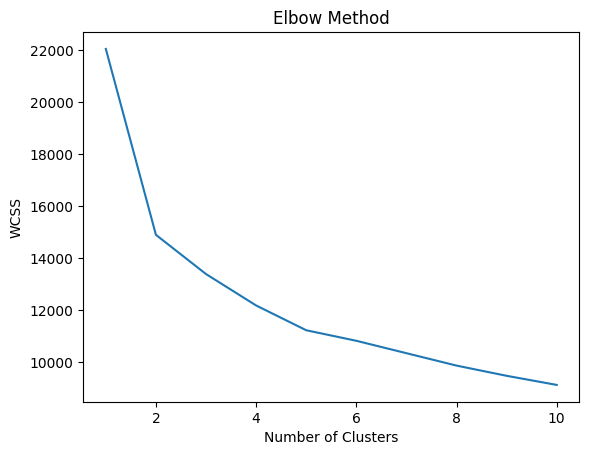

In [ ]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


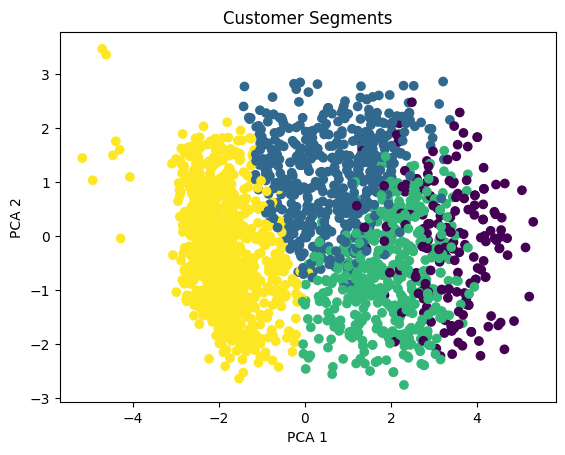

In [ ]:
pca = PCA(2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Cluster'])
plt.title("Customer Segments")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [ ]:
cluster_profile = df.groupby('Cluster')[features].mean()
cluster_profile


,Income,Recency,MntTotal,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmpOverall,Age,Customer_Days
Cluster,,,,,,,,,,
0,80595.451613,48.177419,1584.688172,5.720430,6.338710,8.392473,3.376344,2.037634,49.236559,2527.376344
1,55980.297143,47.337143,691.977143,7.003810,2.895238,7.154286,6.441905,0.232381,54.977143,2630.394286
2,71729.357143,50.973469,1029.318367,4.595918,5.285714,8.800000,2.614286,0.148980,53.471429,2459.959184
3,34162.274900,49.078685,78.177291,2.040837,0.541833,3.199203,6.451195,0.085657,48.250996,2474.218127


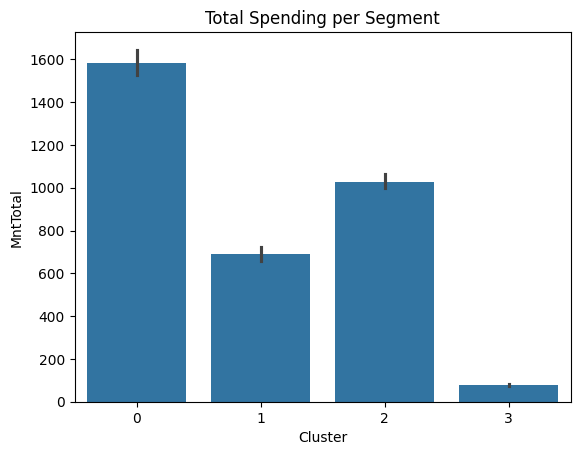

In [ ]:
sns.barplot(x='Cluster', y='MntTotal', data=df)
plt.title("Total Spending per Segment")
plt.show()


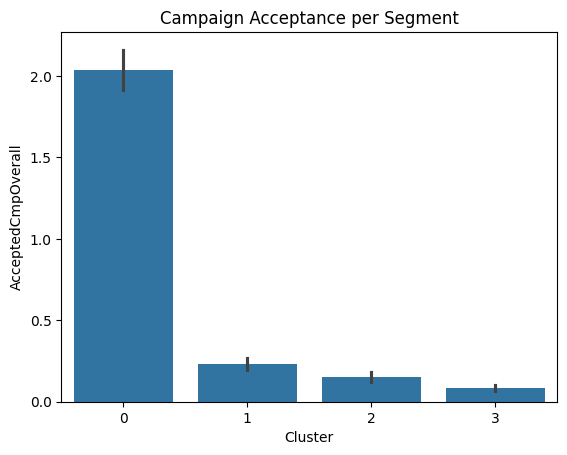

In [ ]:
sns.barplot(x='Cluster', y='AcceptedCmpOverall', data=df)
plt.title("Campaign Acceptance per Segment")
plt.show()


 **CUSTOMER SEGMENTS INSIGHTS**

Segment 0: High Income – High Spending – Frequent Buyers
→ Premium loyal customers.

Segment 1: Low Income – Low Spending – High Web Visits
→ Browsers, convert with offers.

Segment 2: Moderate Income – Moderate Spending – High Store Visits
→ Offline focused customers.

Segment 3: Low Recency – High Income – Low Engagement
→ Dormant high-value customers.

 BUSINESS STRATEGY

✔ Personalized luxury offers for Segment 0  
✔ Discount campaigns for Segment 1  
✔ Improve in-store experience for Segment 2  
✔ Reactivation emails & cashback for Segment 3  

